# Protein Sequence Analysis EDA
**Objective:** To explore protein sequence features and patterns using a bioinformatics dataset.


# Exploratory Data Analysis (EDA) on Gene Expression Dataset
**Objective:** To explore gene expression patterns in cancer vs healthy samples and identify key trends and correlations.


## Step 1: Import Libraries
We will use pandas for data handling and matplotlib/seaborn for visualization.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load Dataset
Load the protein sequence dataset and view first few rows.


In [3]:
df = pd.read_csv("/content/proteins.csv")

In [4]:
df.head()

,Entry,Sequence,GO_list,GO,GO_id,GO_namespace,GO_parents,GO_children,seq_length,mol_weight,...,aa_M,aa_N,aa_P,aa_Q,aa_R,aa_S,aa_T,aa_V,aa_W,aa_Y
0,C0SPC1,MNIDMNWLGQLLGSDWEIFPAGGATGDAYYAKHNGQQLFLKRNSSP...,"['cytoplasm [GO:0005737]', 'ATP binding [GO:00...",cytoplasm [GO:0005737],GO:0005737,cellular_component,"('GO:0110165',)","('GO:1990917', 'GO:0099568', 'GO:0016528', 'GO...",269.0,30790.1862,...,12.0,11.0,11.0,10.0,9.0,14.0,8.0,14.0,10.0,8.0
1,O05512,MFKKHTISLLIIFLLASAVLAKPIEAHTVSPVNPNAQQTTKTVMNW...,"['extracellular region [GO:0005576]', 'mannan ...",extracellular region [GO:0005576],GO:0005576,cellular_component,"('GO:0110165',)","('GO:0043083', 'GO:0099544', 'GO:0098595', 'GO...",362.0,40891.5038,...,7.0,24.0,16.0,14.0,10.0,27.0,22.0,15.0,11.0,20.0
2,O06724,MKFATGELYNRMFVGLIIDDEKIMDLQKAEKKLFELETIPGSLIEC...,"['cytoplasm [GO:0005737]', 'acetylpyruvate hyd...",cytoplasm [GO:0005737],GO:0005737,cellular_component,"('GO:0110165',)","('GO:1990917', 'GO:0099568', 'GO:0016528', 'GO...",301.0,33145.5860,...,9.0,7.0,16.0,8.0,10.0,22.0,19.0,17.0,1.0,6.0
3,O08394,MKETSPIPQPKTFGPLGNLPLIDKDKPTLSLIKLAEEQGPIFQIHT...,"['cytosol [GO:0005829]', 'aromatase activity [...",cytosol [GO:0005829],GO:0005829,cellular_component,"('GO:0110165',)","('GO:0099522',)",1061.0,119466.8051,...,23.0,30.0,56.0,50.0,71.0,59.0,58.0,62.0,12.0,32.0
4,O31616,MKRHYEAVVIGGGIIGSAIAYYLAKENKNTALFESGTMGGRTTSAA...,"['cytoplasm [GO:0005737]', 'FAD binding [GO:00...",cytoplasm [GO:0005737],GO:0005737,cellular_component,"('GO:0110165',)","('GO:1990917', 'GO:0099568', 'GO:0016528', 'GO...",369.0,40936.3550,...,13.0,11.0,14.0,9.0,16.0,20.0,13.0,26.0,7.0,12.0


## Step 3: Dataset Overview
Check number of rows and columns, data types, and basic statistics for numeric features.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6571 entries, 0 to 6570
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entry         6571 non-null   object 
 1   Sequence      6571 non-null   object 
 2   GO_list       6571 non-null   object 
 3   GO            6571 non-null   object 
 4   GO_id         6571 non-null   object 
 5   GO_namespace  6571 non-null   object 
 6   GO_parents    6571 non-null   object 
 7   GO_children   6571 non-null   object 
 8   seq_length    5291 non-null   float64
 9   mol_weight    5291 non-null   float64
 10  pI            5291 non-null   float64
 11  gravy         5291 non-null   float64
 12  instability   5291 non-null   float64
 13  aromaticity   5291 non-null   float64
 14  helix         5291 non-null   float64
 15  turn          5291 non-null   float64
 16  sheet         5291 non-null   float64
 17  aa_A          5290 non-null   float64
 18  aa_C          5290 non-null 

In [6]:
df.describe()

,seq_length,mol_weight,pI,gravy,instability,aromaticity,helix,turn,sheet,aa_A,...,aa_M,aa_N,aa_P,aa_Q,aa_R,aa_S,aa_T,aa_V,aa_W,aa_Y
count,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000,5290.000000,...,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,341.500095,37823.704785,6.567658,-0.138616,35.574363,0.077079,0.345927,0.263397,0.363769,31.749905,...,9.765217,13.386200,14.671078,13.456144,18.085822,18.717769,18.096030,24.261248,3.934972,9.793573
std,213.983324,23729.140356,1.737380,0.392282,9.457977,0.029253,0.044212,0.037833,0.050281,20.792805,...,6.309776,10.093325,10.691551,10.131433,13.970670,13.111659,12.676891,15.399335,3.868994,8.025302
min,57.000000,6446.309700,4.475241,-1.376923,8.151376,0.011834,0.257143,0.150838,0.195266,4.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
25%,179.000000,20018.850300,5.324813,-0.353397,29.750621,0.059233,0.315476,0.241935,0.337043,16.000000,...,5.000000,7.000000,7.000000,6.000000,9.000000,9.000000,9.000000,12.000000,1.000000,4.000000
50%,301.000000,33145.586000,5.929239,-0.220398,35.336232,0.072464,0.345070,0.263838,0.359524,26.000000,...,8.000000,11.000000,13.000000,10.000000,14.000000,15.000000,15.000000,21.000000,3.000000,8.000000
75%,420.000000,46466.609200,7.016683,-0.007051,41.316369,0.093373,0.370253,0.285149,0.381471,42.000000,...,13.000000,18.000000,19.000000,18.000000,23.000000,25.000000,23.000000,33.000000,6.000000,12.000000
max,1486.000000,163295.057000,11.328272,1.120713,61.463128,0.184358,0.570248,0.400000,0.569832,142.000000,...,32.000000,58.000000,69.000000,54.000000,95.000000,80.000000,76.000000,98.000000,20.000000,49.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seq_length,5291.0,341.500095,213.983324,57.000000,179.000000,301.000000,420.000000,1486.000000
mol_weight,5291.0,37823.704785,23729.140356,6446.309700,20018.850300,33145.586000,46466.609200,163295.057000
pI,5291.0,6.567658,1.737380,4.475241,5.324813,5.929239,7.016683,11.328272
gravy,5291.0,-0.138616,0.392282,-1.376923,-0.353397,-0.220398,-0.007051,1.120713
instability,5291.0,35.574363,9.457977,8.151376,29.750621,35.336232,41.316369,61.463128
aromaticity,5291.0,0.077079,0.029253,0.011834,0.059233,0.072464,0.093373,0.184358
helix,5291.0,0.345927,0.044212,0.257143,0.315476,0.345070,0.370253,0.570248
turn,5291.0,0.263397,0.037833,0.150838,0.241935,0.263838,0.285149,0.400000
sheet,5291.0,0.363769,0.050281,0.195266,0.337043,0.359524,0.381471,0.569832
aa_A,5290.0,31.749905,20.792805,4.000000,16.000000,26.000000,42.000000,142.000000


In [8]:
df.shape

(6571, 37)

## Step 4: Sequence Length Distribution
Compute distribution of protein sequence lengths.



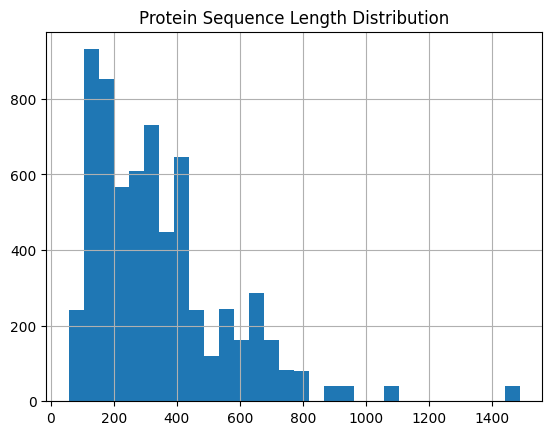

In [10]:
df['length'] = df['Sequence'].apply(len)
df['length'].hist(bins=30)
plt.title("Protein Sequence Length Distribution")
plt.show()

## Step 5: Amino Acid Frequency
Count frequency of each amino acid across all sequences.


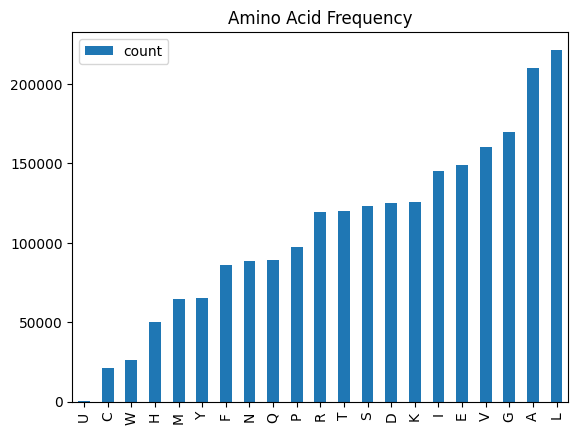

In [12]:
from collections import Counter
all_sequences = ''.join(df['Sequence'])
freq = Counter(all_sequences)
pd.DataFrame.from_dict(freq, orient='index', columns=['count']).sort_values(by='count').plot.bar()
plt.title("Amino Acid Frequency")
plt.show()

## Step 6: Gene Expression Distribution
Visualize the distribution of top 5 genes to see how expression levels vary.


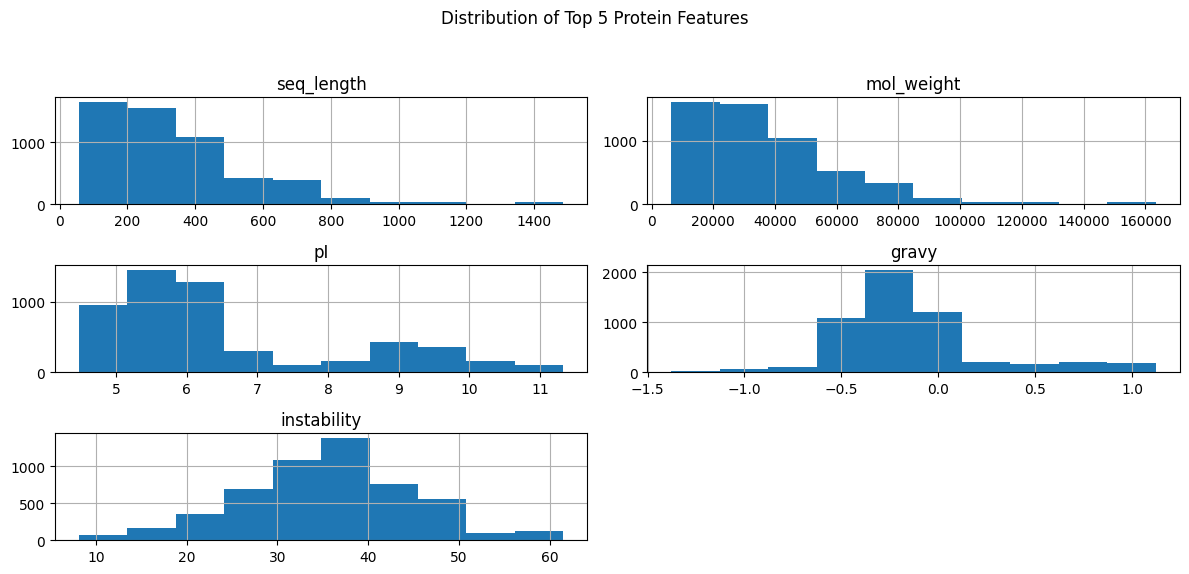

In [14]:
numeric_features = ['seq_length', 'mol_weight', 'pI', 'gravy', 'instability']
df[numeric_features].hist(figsize=(12,6))
plt.suptitle("Distribution of Top 5 Protein Features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

## Step 7: Gene-Gene Correlation
Visualize correlation between genes to identify co-expression patterns.


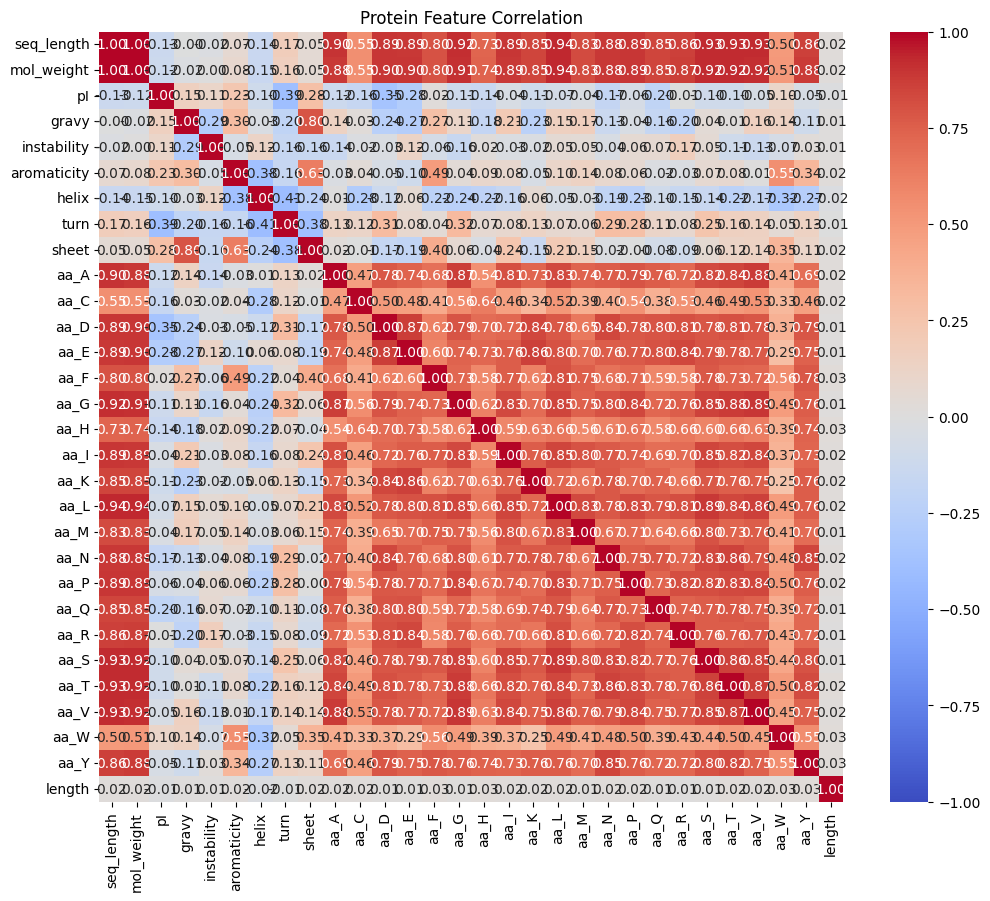

In [16]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1, annot=True, fmt=".2f")
plt.title("Protein Feature Correlation")
plt.show()

## Step 8: Class-wise Gene Expression
Compare expression levels of a gene across classes using a boxplot.


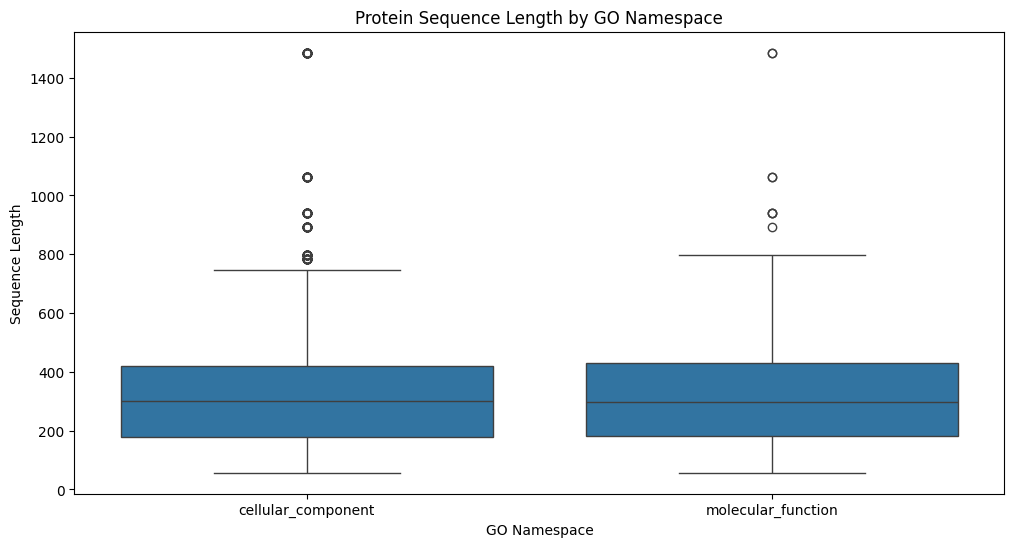

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x='GO_namespace', y='seq_length', data=df)
plt.title("Protein Sequence Length by GO Namespace")
plt.xlabel("GO Namespace")
plt.ylabel("Sequence Length")
plt.show()

## Step 9: PCA for Dimensionality Reduction
Use PCA to reduce high-dimensional gene expression data to 2 components for visualization.


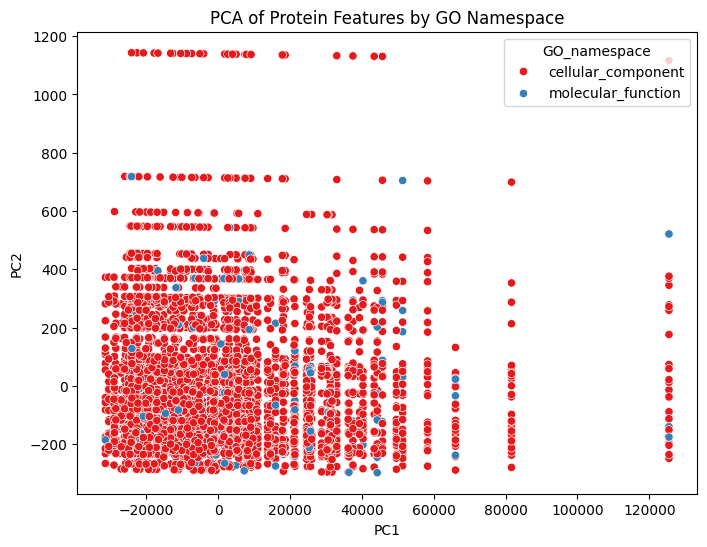

In [22]:
from sklearn.decomposition import PCA

numeric_df = df.select_dtypes(include=['float64', 'int64']).dropna() # Drop rows with NaN values
pca = PCA(n_components=2)
components = pca.fit_transform(numeric_df)

pca_df = pd.DataFrame(data=components, columns=['PC1','PC2'])
pca_df['GO_namespace'] = df.loc[numeric_df.index, 'GO_namespace'] # Align GO_namespace with the cleaned numeric_df

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='GO_namespace', data=pca_df, palette='Set1')
plt.title("PCA of Protein Features by GO Namespace")
plt.show()

## Key Insights Explained

Based on the exploratory data analysis of the protein sequence dataset, here are the key insights derived from the recent steps:

*   **Protein Feature Correlation**: The heatmap generated visualizes the linear relationships between various quantitative protein features (like sequence length, molecular weight, pI, gravy, instability, and amino acid counts). This is crucial for understanding how different characteristics of proteins co-vary. For example, if 'seq_length' and 'mol_weight' show a strong positive correlation, it's an expected finding, as longer sequences typically mean higher molecular weight. This helps in identifying redundant features or features that might be good predictors for others.

*   **Protein Sequence Length by GO Namespace**: The boxplot illustrates the distribution of protein sequence lengths across different Gene Ontology (GO) namespaces (e.g., 'cellular_component', 'molecular_function', 'biological_process'). This provides insight into whether proteins involved in specific biological roles or localized in certain cellular compartments tend to have distinct length profiles. For instance, proteins in the 'cellular_component' category might exhibit a wider range of lengths compared to those primarily involved in 'molecular_function'. This can hint at structural constraints or functional requirements tied to protein size.

*   **PCA of Protein Features by GO Namespace**: The Principal Component Analysis (PCA) plot reduces the complexity of the multi-dimensional protein feature data into a 2D visualization. By coloring the data points according to their GO Namespace, we can observe if proteins from different functional categories naturally cluster together or separate in this reduced feature space. This can reveal underlying patterns or similarities between proteins that share biological roles or localizations, even when considering many different features simultaneously. It helps confirm if GO annotations align with the intrinsic properties captured by the numeric features.